## Project Ojective - Dog Breed Classification

We are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The objective of the project is to create a classifier capable of determining a dog's breed from a photo. We will use traditional CNN with data augmentation and Transfer Learning by VGG16 model with weights pre-trained on Imagenet for calssification of the dog breed.

In [3]:
#This project is executed LOCALLY using CUDA for GPU Accelerated Python

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10634542658604439028
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4832296960
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6328440831878469799
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


### Load Dataset Files

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf   ##Running Tensorflow on LOCAL GPU (Python 3.7(tensorflow))
import numpy as np
import pandas as pd

import time
from datetime import timedelta

import math
import os
import random

from sklearn.preprocessing import OneHotEncoder
import scipy.misc
from scipy.stats import itemfreq
from random import sample
import pickle

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dense, Activation, Dropout, Flatten, Reshape

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Image manipulation
import PIL.Image
from IPython.display import display

# Open a Zip File
from zipfile import ZipFile
from io import BytesIO

In [2]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile

Using TensorFlow backend.


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [3]:
project_path = "dogImages/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels.

In [4]:
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [5]:
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [7]:
with ZipFile(project_path+'sample_submission.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [12]:
with ZipFile(project_path+'labels.zip', 'r') as z:
  z.extractall()

#### We now have 4 files - Train folder, test folder and labels.csv and sample_submission.csv 

#### All the files associated with this program are in the same folder where the notebook resides

### Read labels.csv file using pandas

In [18]:
labels = pd.read_csv('labels.csv')

In [19]:
labels.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [20]:
labels.shape

(10222, 2)

### Print the count of each category of Dogs given in the dataset



In [21]:
breed_count = labels['breed'].value_counts()

In [22]:
breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [23]:
breed_count.shape

(120,)

### Get one-hot encodings of labels

In [24]:
targets = pd.Series(labels['breed'])
one_hot = pd.get_dummies(targets, sparse=True)
one_hot_labels = np.asarray(one_hot)

In [25]:
one_hot_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [26]:
img_rows = 128
img_col = 128 
img_channel = 1

from tqdm import tqdm
import cv2

In [27]:
x_train = []
y_train = []

for id,breed in tqdm(labels.values):
  train_img = cv2.imread('./train/{}.jpg'.format(id),1)
  train_img_resize = cv2.resize(train_img, (img_rows,img_col))
  x_train.append(train_img_resize)
  y_train.append(breed)

100%|████████████████████████████████████████████████████████████████████████████| 10222/10222 [01:50<00:00, 92.45it/s]


In [28]:
x_train[0].shape

(128, 128, 3)

In [29]:
y_train[0]

'boston_bull'

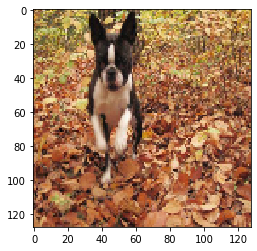

In [30]:
import matplotlib.pyplot as plt
image =x_train[0]

im2 = image.copy()
im2[:, :, 0] = image[:, :, 2]
im2[:, :, 2] = image[:, :, 0]
plt.imshow(im2)


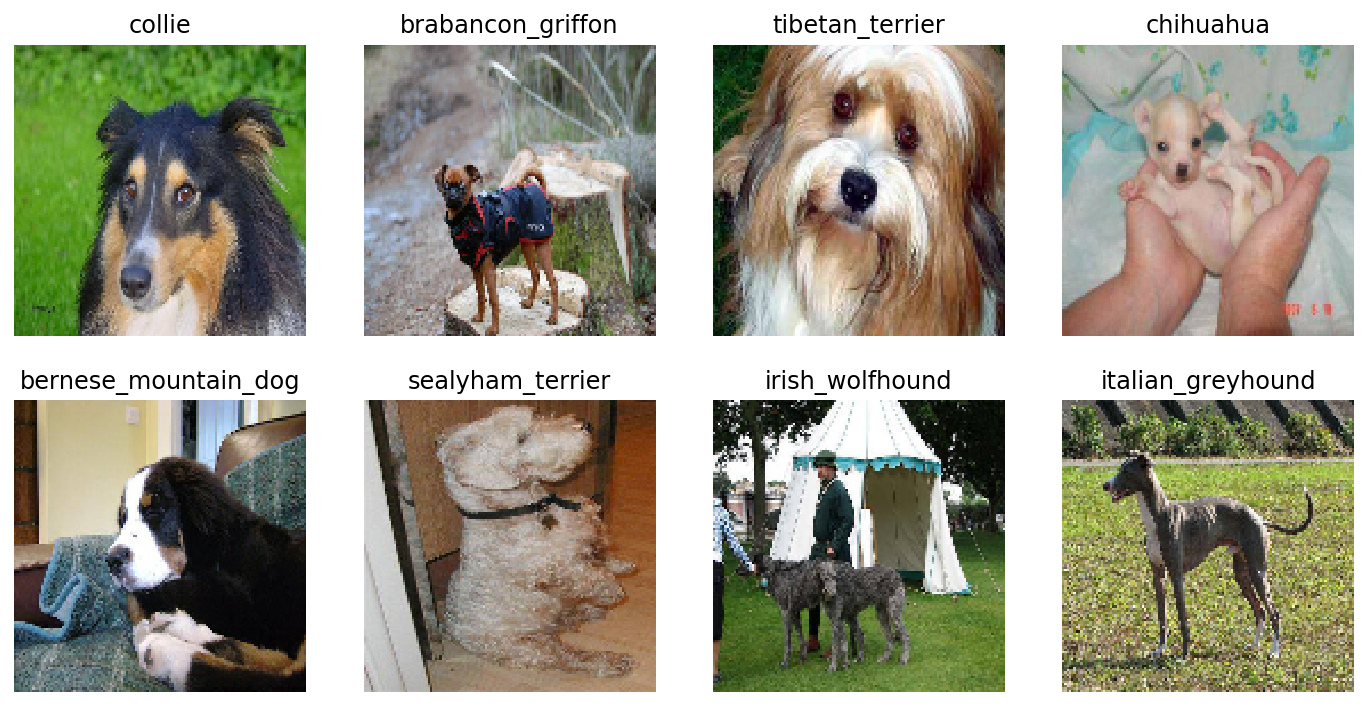

In [31]:


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 6))
for i in range(8):
    random_index = random.randint(0, 10221)
    plt.subplot(2, 4, i+1)
    plt.imshow(x_train[random_index][:,:,::-1])
    plt.title(y_train[random_index])
    plt.axis('off')

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [32]:
y_train = pd.get_dummies(y_train, sparse=True)


In [33]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [34]:
y_train.shape

(10222, 120)

In [35]:
x_train.shape

(10222, 128, 128, 3)

In [36]:
y_train.dtype

dtype('uint8')

In [37]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_train /= 255
#y_train /= 255

In [38]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [39]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)
print (len(x_train2))
print (len(x_val))

8177
2045


In [40]:
x_train2[0].shape

(128, 128, 3)

In [41]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)

In [42]:
x_val = x_val.reshape(x_val.shape[0],128,128,3)

In [43]:
print (x_train2.shape)
print (x_val.shape)

(8177, 128, 128, 3)
(2045, 128, 128, 3)


In [44]:
print(y_train2.shape)
print(y_val.shape)

(8177, 120)
(2045, 120)


In [45]:
print(y_val[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


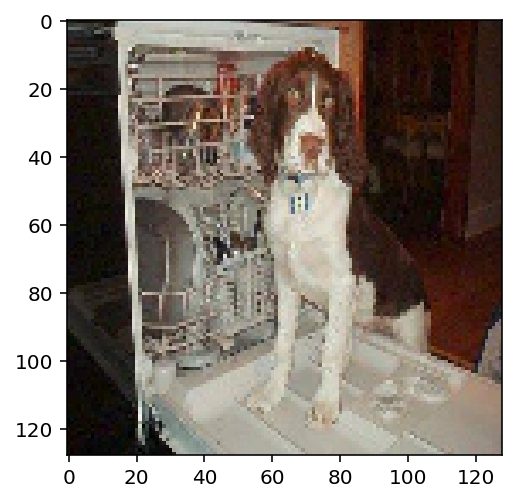

In [46]:
import matplotlib.pyplot as plt
image =x_train2[0]

im2 = image.copy()
im2[:, :, 0] = image[:, :, 2]
im2[:, :, 2] = image[:, :, 0]
plt.imshow(im2)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [48]:
import pandas as pd
sample_submission = pd.read_csv('sample_submission.csv')

In [49]:
sample_submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [50]:
test_img=sample_submission['id']


In [51]:
test_img.shape

(10357,)

In [52]:
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [53]:
img_rows = 128
img_col = 128 
img_channel = 1

x_test_feature = []

i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_col)) 
    x_test_feature.append(img_resize)

100%|████████████████████████████████████████████████████████████████████████████| 10357/10357 [01:51<00:00, 92.88it/s]


In [54]:
x_test_feature[0].shape

(128, 128, 3)

Normalize the test data and convert it into 4 dimensions

In [55]:
import numpy as np
x_test = np.array(x_test_feature)

In [56]:
x_test = x_test.astype('float32')
x_test /= 255

In [57]:
x_test.shape

(10357, 128, 128, 3)

In [58]:
x_test = x_test.reshape(x_test.shape[0],128,128,3)

In [59]:
print (x_test.shape)

(10357, 128, 128, 3)


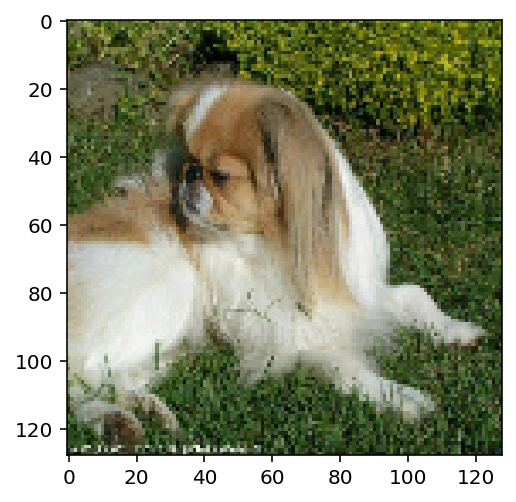

In [60]:
image =x_test[0]

im2 = image.copy()
im2[:, :, 0] = image[:, :, 2] #To correctly print the colors by changing it to RGB
im2[:, :, 2] = image[:, :, 0]
plt.imshow(im2)


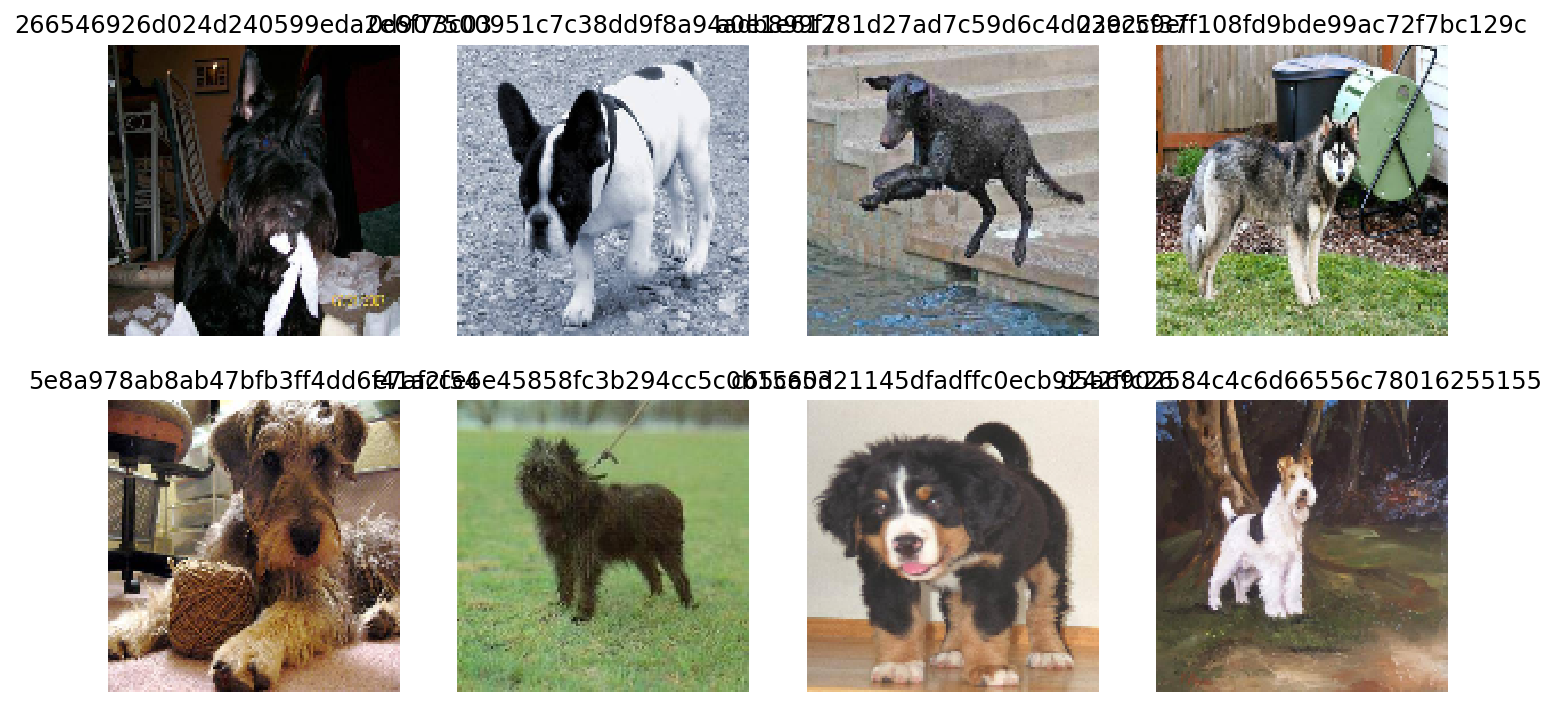

In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 6))
for i in range(8):
    random_index = random.randint(0, 10221)
    plt.subplot(2, 4, i+1)
    plt.imshow(x_test[random_index][:,:,::-1])
    plt.title(test_img[random_index])
    plt.axis('off')

Note: x_test and corresponding label IDs will not be used instead the train and val data will be used for model building and testing.

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [62]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
   
# 1st CNN Layer

model = tf.keras.Sequential()
model.add(Convolution2D(32,5, 5, input_shape=(128, 128, 3)))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))

# 2nd CNN Layer

model.add(Convolution2D(32,3, 3, input_shape=(128, 128, 3)))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))

# Fully Connected Layer
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(120))
model.add(Activation('softmax'))

In [63]:
# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
# Store Training Results
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')
callback_list = [early_stopping]

In [65]:
# Train the model
model.fit(x_train2, y_train2, batch_size=10, nb_epoch=10, validation_data=(x_val, y_val))

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 12s 2ms/sample - loss: 4.8176 - accuracy: 0.0111 - val_loss: 4.7617 - val_accuracy: 0.0127
Epoch 2/10
8177/8177 [==============================] - 6s 769us/sample - loss: 4.7405 - accuracy: 0.0183 - val_loss: 4.7007 - val_accuracy: 0.0176
Epoch 3/10
8177/8177 [==============================] - 6s 791us/sample - loss: 4.6815 - accuracy: 0.0241 - val_loss: 4.6639 - val_accuracy: 0.0181
Epoch 4/10
8177/8177 [==============================] - 7s 795us/sample - loss: 4.6402 - accuracy: 0.0259 - val_loss: 4.6178 - val_accuracy: 0.0259
Epoch 5/10
8177/8177 [==============================] - 7s 811us/sample - loss: 4.6033 - accuracy: 0.0256 - val_loss: 4.5774 - val_accuracy: 0.0401
Epoch 6/10
8177/8177 [==============================] - 6s 744us/sample - loss: 4.5717 - accuracy: 0.0317 - val_loss: 4.5644 - val_accuracy: 0.0347
Epoch 7/10
8177/8177 [==============================] - 6s 752us/

### Use batch_size = 128 and epochs = 50 and execute the model

In [66]:
TRAIN = False
BATCH_SIZE = 128
EPOCHS = 50

In [67]:
history = model.fit(x_train2, y_train2,epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1,validation_data=(x_val,y_val))

Train on 8177 samples, validate on 2045 samples
Epoch 1/50
8177/8177 [==============================] - 2s 222us/sample - loss: 4.3748 - accuracy: 0.0509 - val_loss: 4.4337 - val_accuracy: 0.0548
Epoch 2/50
8177/8177 [==============================] - 2s 205us/sample - loss: 4.3586 - accuracy: 0.0550 - val_loss: 4.4190 - val_accuracy: 0.0518
Epoch 3/50
8177/8177 [==============================] - 2s 212us/sample - loss: 4.3443 - accuracy: 0.0516 - val_loss: 4.4117 - val_accuracy: 0.0513
Epoch 4/50
8177/8177 [==============================] - 2s 213us/sample - loss: 4.3438 - accuracy: 0.0527 - val_loss: 4.4069 - val_accuracy: 0.0528
Epoch 5/50
8177/8177 [==============================] - 2s 208us/sample - loss: 4.3291 - accuracy: 0.0548 - val_loss: 4.3951 - val_accuracy: 0.0528
Epoch 6/50
8177/8177 [==============================] - 2s 209us/sample - loss: 4.3293 - accuracy: 0.0550 - val_loss: 4.3921 - val_accuracy: 0.0509
Epoch 7/50
8177/8177 [==============================] - 2s 210us

Poor Model Accuracy even after 50 epochs..!

### Use Data Augmentation in the above model to see if the accuracy improves


In [69]:
from keras.preprocessing.image import ImageDataGenerator
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

datagen.fit(x_train2)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

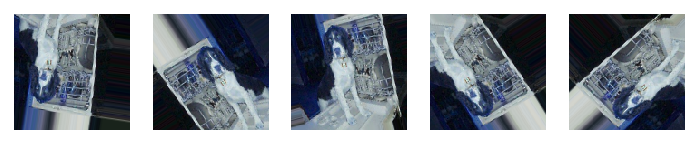

In [70]:
from matplotlib import pyplot as plt
train_generator = datagen.flow(x_train2[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(train_generator.next().squeeze(), cmap='Blues')
    plt.plot()
plt.show()

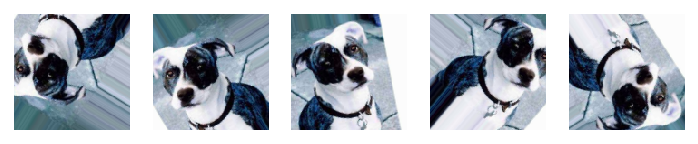

In [71]:
from matplotlib import pyplot as plt
val_generator = datagen.flow(x_val[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(val_generator.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [72]:
history =model.fit(datagen.flow(x_train2, y_train2,batch_size=1), steps_per_epoch=x_train2.shape[0], epochs=10, validation_data=(x_val, y_val), callbacks=callback_list)

Train for 8177 steps, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 80s 10ms/step - loss: 4.8103 - accuracy: 0.0104 - val_loss: 4.7889 - val_accuracy: 0.0083
Epoch 2/10
8177/8177 [==============================] - 79s 10ms/step - loss: 4.7899 - accuracy: 0.0120 - val_loss: 4.7951 - val_accuracy: 0.0112
Epoch 3/10
8177/8177 [==============================] - 77s 9ms/step - loss: 4.7842 - accuracy: 0.0114 - val_loss: 4.8251 - val_accuracy: 0.0073
Epoch 4/10
8177/8177 [==============================] - 75s 9ms/step - loss: 4.7834 - accuracy: 0.0131 - val_loss: 4.7949 - val_accuracy: 0.0093
Epoch 5/10
8177/8177 [==============================] - 79s 10ms/step - loss: 4.7830 - accuracy: 0.0114 - val_loss: 4.8020 - val_accuracy: 0.0073
Epoch 6/10
8177/8177 [==============================] - 81s 10ms/step - loss: 4.7817 - accuracy: 0.0133 - val_loss: 4.7943 - val_accuracy: 0.0103
Epoch 7/10
8177/8177 [==============================] - 80s 10ms/step - loss: 4

Model accuracy is still very poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [73]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [74]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [75]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import *
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling3D


x = base_model.output
x = Flatten()(x)
x = Dropout(0.2)(x)
# let's add two fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)

# and a softmax layer for 120 classes
predictions = Dense(120, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)


In [76]:
# summarize
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Make all the layers in the base_model (VGG16) to be non-trainable

In [77]:
for layer in base_model.layers:
  #if('conv' in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in base_model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

input_1
False
block1_conv1
False
block1_conv2
False
block1_pool
False
block2_conv1
False
block2_conv2
False
block2_pool
False
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_pool
False
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_pool
False
block5_conv1
False
block5_conv2
False
block5_conv3
False
block5_pool
False
global_average_pooling2d
False


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

In [78]:
# Loss and Optimizer
from tensorflow.keras.optimizers import Adam
from keras.losses import categorical_crossentropy

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Try to get training and validation accuracy to be more than 90%

In [81]:
history = model.fit(x_train2, y_train2,epochs=10, batch_size=128, verbose=1,validation_data=(x_val,y_val))

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 25s 3ms/sample - loss: 4.8014 - accuracy: 0.0115 - val_loss: 4.7671 - val_accuracy: 0.0161
Epoch 2/10
8177/8177 [==============================] - 14s 2ms/sample - loss: 4.7443 - accuracy: 0.0193 - val_loss: 4.7283 - val_accuracy: 0.0264
Epoch 3/10
8177/8177 [==============================] - 14s 2ms/sample - loss: 4.6962 - accuracy: 0.0275 - val_loss: 4.6747 - val_accuracy: 0.0347
Epoch 4/10
8177/8177 [==============================] - 16s 2ms/sample - loss: 4.6289 - accuracy: 0.0408 - val_loss: 4.6016 - val_accuracy: 0.0533
Epoch 5/10
8177/8177 [==============================] - 14s 2ms/sample - loss: 4.5398 - accuracy: 0.0583 - val_loss: 4.5054 - val_accuracy: 0.0611
Epoch 6/10
8177/8177 [==============================] - 16s 2ms/sample - loss: 4.4286 - accuracy: 0.0757 - val_loss: 4.4031 - val_accuracy: 0.0685
Epoch 7/10
8177/8177 [==============================] - 14s 2ms/sample

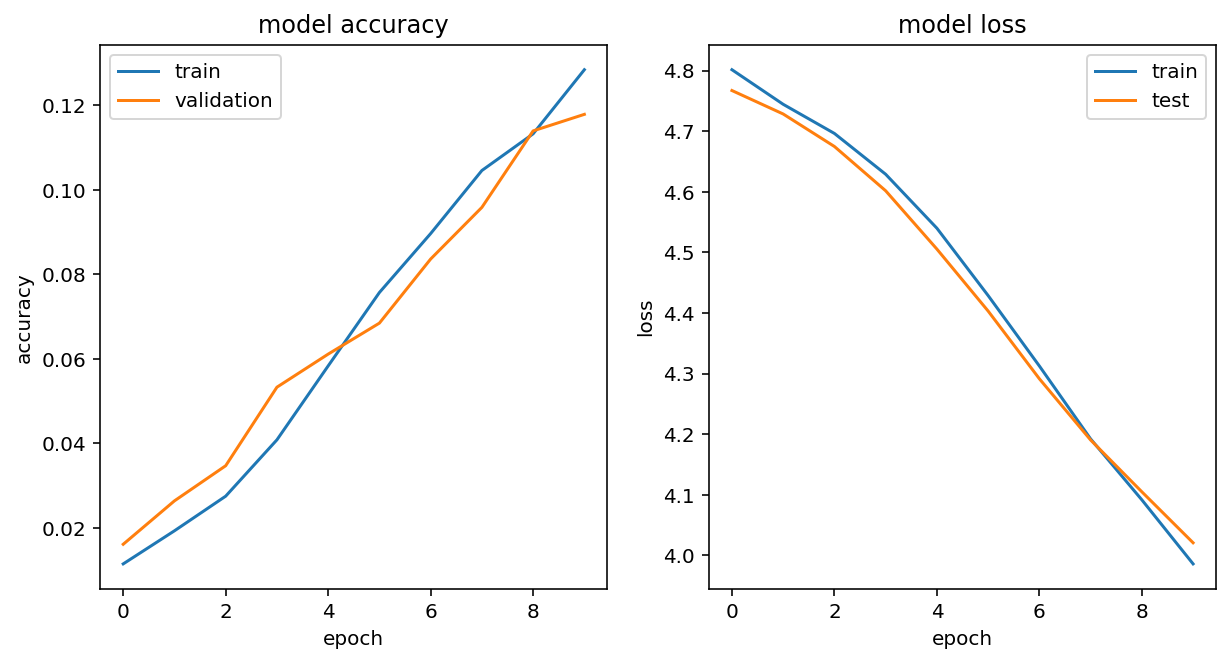

In [82]:
def plot_acc_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
 
plot_acc_loss(history)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = np.argmax(model.predict(x_val), axis=1)

In [84]:
predictions

array([ 42, 115, 109, ...,  79,  73,  73], dtype=int64)

In [85]:
y_val[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.], dtype=float32)

In [86]:
y_val_label=np.argmax(y_val, axis=1)

In [87]:
y_val_label

array([104, 115,  46, ...,  81,  85,  73], dtype=int64)

In [88]:
print("\nAccuracy on Test Data: ", accuracy_score(y_val_label, predictions))
print("\nNumber of correctly identified images: ",
      accuracy_score(y_val_label, predictions, normalize=False),"\n")
confusion_matrix(y_val_label, predictions)


Accuracy on Test Data:  0.1178484107579462

Number of correctly identified images:  241 



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 8, 1, ..., 3, 0, 0],
       [0, 0, 4, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

Leveraging VGG16 Network to see if the accuracy score improves ?

In [89]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Creating a checkpointer 
checkpointer = ModelCheckpoint(filepath=('vgg16_weights_full_model.h5'), 
                               verbose=1,save_best_only=True)

In [90]:
# load the VGG16 network 
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=x_train.shape[1:])
model_vgg.summary()

[INFO loading network...
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 

In [91]:
from tensorflow.keras.layers import Dropout, Flatten, GlobalAveragePooling2D
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dropout(0.2))
model_transfer_full.add(Dense(1024, activation='relu'))
model_transfer_full.add(Dense(256, activation='relu'))
model_transfer_full.add(Dense(120, activation='softmax'))
model_transfer_full.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_7 (Dense)              (None, 120)               30840     
Total params: 15,533,240
Trainable params: 15,533,240
Non-trainable params: 0
__________________________________________

In [92]:
opt = Adam(lr=0.00001)
model_transfer_full.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_full.fit(x_train2, y_train2, batch_size=32, epochs=30,
          validation_data=(x_val, y_val),callbacks=[checkpointer],verbose=1, shuffle=True)

Train on 8177 samples, validate on 2045 samples
Epoch 1/30
8160/8177 [============================>.] - ETA: 0s - loss: 4.7800 - accuracy: 0.0123
Epoch 00001: val_loss improved from inf to 4.68523, saving model to vgg16_weights_full_model.h5
8177/8177 [==============================] - 57s 7ms/sample - loss: 4.7799 - accuracy: 0.0122 - val_loss: 4.6852 - val_accuracy: 0.0240
Epoch 2/30
8160/8177 [============================>.] - ETA: 0s - loss: 4.4973 - accuracy: 0.0517
Epoch 00002: val_loss improved from 4.68523 to 4.19786, saving model to vgg16_weights_full_model.h5
8177/8177 [==============================] - 44s 5ms/sample - loss: 4.4966 - accuracy: 0.0519 - val_loss: 4.1979 - val_accuracy: 0.0900
Epoch 3/30
8160/8177 [============================>.] - ETA: 0s - loss: 3.9725 - accuracy: 0.1210
Epoch 00003: val_loss improved from 4.19786 to 3.67822, saving model to vgg16_weights_full_model.h5
8177/8177 [==============================] - 45s 6ms/sample - loss: 3.9718 - accuracy: 0.1

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = np.argmax(model_transfer_full.predict(x_val), axis=1)
y_val_label=np.argmax(y_val, axis=1)

In [94]:
print("\nAccuracy on Test Data: ", accuracy_score(y_val_label, predictions))
print("\nNumber of correctly identified images: ",
      accuracy_score(y_val_label, predictions, normalize=False),"\n")
confusion_matrix(y_val_label, predictions)


Accuracy on Test Data:  0.4136919315403423

Number of correctly identified images:  846 



array([[ 4,  0,  0, ...,  0,  0,  0],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  1,  0,  0],
       ...,
       [ 0,  0,  0, ...,  4,  0,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  0,  5]], dtype=int64)

#### Due to memory limitations, a small subset of the data (256/10221) is taken and operated on which leads to low accuracy levels (1%). On using transfer learning with VGG we obtain an accuracy level of 2-3 %.